In [2]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [10]:
(X_train_0, y_train_0), (X_test_0, y_test_0) = mnist.load_data()
print("Shape of training data: ", X_train_0.shape)
print()
'''Since shape of training data should be changed'''
number_of_features = X_train_0.shape[1] * X_train_0.shape[2]
unique_outcomes = np.unique(y_train_0)
number_of_unique_outcomes = len(unique_outcomes)

X_train = np.reshape(X_train_0, (len(X_train_0), number_of_features))
X_test = np.reshape(X_test_0, (len(X_test_0), number_of_features))

print('Shape of training data after reshape :', X_train.shape)

y_train = keras.utils.to_categorical(y_train_0, 
                                     num_classes = number_of_unique_outcomes)

y_test = keras.utils.to_categorical(y_test_0, 
                                     num_classes = number_of_unique_outcomes)


Shape of training data:  (60000, 28, 28)

Shape of training data after reshape : (60000, 784)


In [11]:
model = Sequential()
model.add(Dense(
                units = 250,
                activation = 'sigmoid',
                input_shape=(number_of_features, )))
model.add(Dense(
                units = 100,
                activation = 'sigmoid'))
model.add(Dense(
                units = number_of_unique_outcomes,
                activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(    
                    x=X_train,
                    y=y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_split=0.1)

loss,accuracy = model.evaluate(
                                x = X_test,
                                y = y_test)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 3s - loss: 1.7987 - accuracy: 0.5777 - val_loss: 1.3099 - val_accuracy: 0.8012
Epoch 2/10
 - 2s - loss: 1.0669 - accuracy: 0.8128 - val_loss: 0.7956 - val_accuracy: 0.8767
Epoch 3/10
 - 3s - loss: 0.7269 - accuracy: 0.8624 - val_loss: 0.5656 - val_accuracy: 0.9002
Epoch 4/10
 - 2s - loss: 0.5600 - accuracy: 0.8836 - val_loss: 0.4477 - val_accuracy: 0.9163
Epoch 5/10
 - 3s - loss: 0.4657 - accuracy: 0.8957 - val_loss: 0.3762 - val_accuracy: 0.9208
Epoch 6/10
 - 3s - loss: 0.4074 - accuracy: 0.9034 - val_loss: 0.3328 - val_accuracy: 0.9260
Epoch 7/10
 - 2s - loss: 0.3670 - accuracy: 0.9097 - val_loss: 0.3033 - val_accuracy: 0.9287
Epoch 8/10
 - 2s - loss: 0.3358 - accuracy: 0.9155 - val_loss: 0.2776 - val_accuracy: 0.9313
Epoch 9/10
 - 3s - loss: 0.3127 - accuracy: 0.9194 - val_loss: 0.2613 - val_accuracy: 0.9352
Epoch 10/10
 - 2s - loss: 0.2938 - accuracy: 0.9234 - val_loss: 0.2466 - val_accuracy: 0.9398
10000/10000 [=======

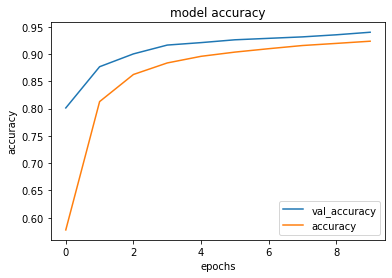

In [15]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['val_accuracy','accuracy'])
# history.history.keys()

## Early Stopping

Early stopping is a tactic used in lots of ML models, not just neural networks. As the name suggests, early stopping prevents a model from overfitting by stopping training earlier than specified. Typically, early stopping is tied to a metric (or metrics) like validation loss or validation accuracy—if scores on a validation metric stop improving (or get worse) while training scores continue to rise, we're probably overfitting and we should stop training.

In [20]:
stop_epoch = EarlyStopping(
                           monitor = 'val_loss',
                           patience = 3,
                           restore_best_weights = True)


model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(    
                    x=X_train,
                    y=y_train,
                    batch_size=100,
                    epochs=50,
                    verbose=2,
                    callbacks = [stop_epoch],
                    validation_split=0.1)

loss,accuracy = model.evaluate(
                                x = X_test,
                                y = y_test)


Train on 54000 samples, validate on 6000 samples
Epoch 1/50
 - 1s - loss: 0.0532 - accuracy: 0.9886 - val_loss: 0.1025 - val_accuracy: 0.9677
Epoch 2/50
 - 1s - loss: 0.0509 - accuracy: 0.9897 - val_loss: 0.1017 - val_accuracy: 0.9683
Epoch 3/50
 - 1s - loss: 0.0505 - accuracy: 0.9895 - val_loss: 0.1011 - val_accuracy: 0.9688
Epoch 4/50
 - 1s - loss: 0.0494 - accuracy: 0.9897 - val_loss: 0.1004 - val_accuracy: 0.9712
Epoch 5/50
 - 1s - loss: 0.0483 - accuracy: 0.9903 - val_loss: 0.1022 - val_accuracy: 0.9690
Epoch 6/50
 - 1s - loss: 0.0472 - accuracy: 0.9904 - val_loss: 0.1050 - val_accuracy: 0.9678
Epoch 7/50
 - 1s - loss: 0.0473 - accuracy: 0.9906 - val_loss: 0.1011 - val_accuracy: 0.9678
10000/10000 [==============================] - 0s 25us/step
